# **Applied Machine Learning Homework 5**
**Due 02 Dec 2023 (Tuesday) 11:59PM EST**

Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).

2) Please include your Name and UNI below.

## Name : Arjun Bhan

## UNI : AB5666

## Convolutional Neural Network

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


In [3]:
np.unique(y_dev)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

3.1 We will be implementing the one of the first CNN models put forward by Yann LeCunn, which is commonly refered to as LeNet-5. The network has the following layers:
1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) 2D convolutional layer with 120 filters, 5x5 kernel, ReLU activation. Note that this layer has 120 output channels (filters), and each channel has only 1 number. The output of this layer is just a vector with 120 units!

6) A fully connected layer with 84 units, ReLU activation

7) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [4]:
model = Sequential([
  Conv2D(filters = 6, kernel_size = (5,5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
  MaxPool2D(pool_size = (2, 2)),
  Conv2D(filters = 16, kernel_size = (5,5), padding = 'valid', activation = 'relu'),
  MaxPool2D(pool_size = (2, 2)),
  Conv2D(filters = 120, kernel_size = (5,5), activation = 'relu'),
  Flatten(),
  Dense(units = 84, activation = 'relu'),
  Dense(units = 10, activation = 'softmax')
])


In [5]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

###3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [7]:
y_train_encode = to_categorical(y_train, num_classes = 10)
y_val_encode = to_categorical(y_val, num_classes = 10)
y_test_encode = to_categorical(y_test, num_classes = 10)

In [8]:
y_train_encode.shape

(40000, 10)

In [9]:
#Your code here
history = model.fit(X_train, y_train_encode, epochs = 20, validation_data = (X_val, y_val_encode))

Epoch 1/20


1250/1250 [==============================] - 22s 14ms/step - loss: 1.5846 - accuracy: 0.4204 - val_loss: 1.3810 - val_accuracy: 0.5136
Epoch 2/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.3071 - accuracy: 0.5324 - val_loss: 1.2654 - val_accuracy: 0.5472
Epoch 3/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.1896 - accuracy: 0.5747 - val_loss: 1.2574 - val_accuracy: 0.5527
Epoch 4/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0895 - accuracy: 0.6136 - val_loss: 1.1377 - val_accuracy: 0.5974
Epoch 5/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0158 - accuracy: 0.6399 - val_loss: 1.1160 - val_accuracy: 0.6087
Epoch 6/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.9567 - accuracy: 0.6597 - val_loss: 1.1097 - val_accuracy: 0.6176
Epoch 7/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.9066 - accuracy: 0.6781 - val_loss: 1.0480

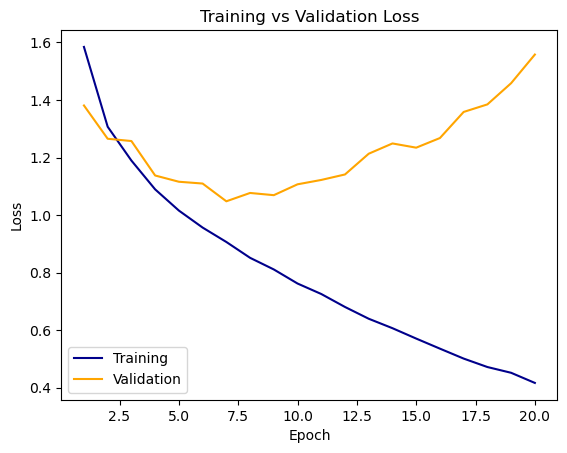

In [10]:
# #Your code here
trainLoss= history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, 21)
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(epochs, trainLoss, label = 'Training', color = 'darkblue')
plt.plot(epochs, valLoss, label = 'Validation', color = 'orange')
plt.legend()
plt.show()


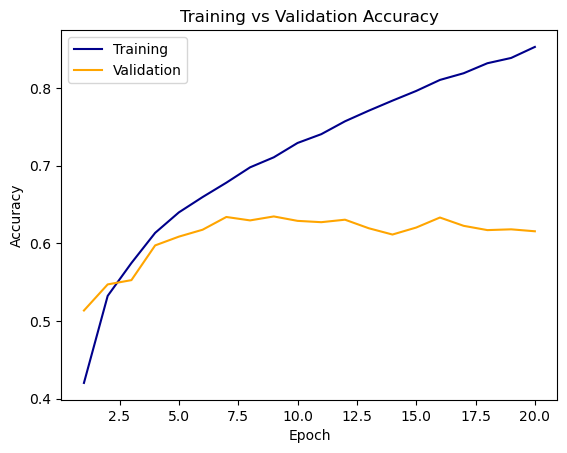

In [11]:
trainAccuracy= history.history['accuracy']
valAccuracy = history.history['val_accuracy']
epochs = range(1, 21)
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs, trainAccuracy, label = 'Training', color = 'darkblue')
plt.plot(epochs, valAccuracy, label = 'Validation', color = 'orange')
plt.legend()
plt.show()

In [12]:
#Your code here
loss, accur = model.evaluate(x_test, y_test_encode)
print('Loss', loss)
print('Accuracy', accur)

313/313 [==============================] - 3s 8ms/step - loss: 1.6165 - accuracy: 0.6058
Loss 1.6164515018463135
Accuracy 0.6057999730110168


3.4 Overfitting

1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

displaying train vs validation loss over each epoch
displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

3.4.1 Dropout

In [13]:
model = Sequential([
  Conv2D(filters = 6, kernel_size = (5,5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
  Dropout(.3),
  MaxPool2D(pool_size = (2, 2)),
  Conv2D(filters = 16, kernel_size = (5,5), padding = 'valid', activation = 'relu'),
  Dropout(.3),  
  MaxPool2D(pool_size = (2, 2)),
  Conv2D(filters = 120, kernel_size = (5,5), activation = 'relu'),
  Dropout(.3),
  Flatten(),
  Dense(units = 84, activation = 'relu'),
  Dropout(.3),
  Dense(units = 10, activation = 'softmax')
])


In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train_encode, epochs = 20, validation_data = (X_val, y_val_encode))

Epoch 1/20
1250/1250 [==============================] - 28s 19ms/step - loss: 1.7296 - accuracy: 0.3641 - val_loss: 1.5581 - val_accuracy: 0.4640
Epoch 2/20
1250/1250 [==============================] - 23s 19ms/step - loss: 1.4684 - accuracy: 0.4712 - val_loss: 1.4101 - val_accuracy: 0.5287
Epoch 3/20
1250/1250 [==============================] - 23s 18ms/step - loss: 1.3581 - accuracy: 0.5159 - val_loss: 1.4276 - val_accuracy: 0.5200
Epoch 4/20
1250/1250 [==============================] - 23s 19ms/step - loss: 1.2957 - accuracy: 0.5425 - val_loss: 1.3058 - val_accuracy: 0.5388
Epoch 5/20
1250/1250 [==============================] - 24s 19ms/step - loss: 1.2520 - accuracy: 0.5564 - val_loss: 1.2477 - val_accuracy: 0.5605
Epoch 6/20
1250/1250 [==============================] - 24s 20ms/step - loss: 1.2072 - accuracy: 0.5729 - val_loss: 1.2009 - val_accuracy: 0.5763
Epoch 7/20
1250/1250 [==============================] - 23s 19ms/step - loss: 1.1766 - accuracy: 0.5857 - val_loss: 1.1933 -

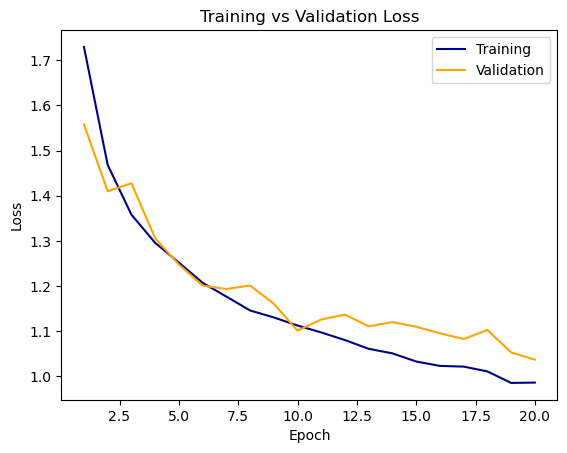

In [16]:
#Your code here
trainLoss= history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, 21)
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(epochs, trainLoss, label = 'Training', color = 'darkblue')
plt.plot(epochs, valLoss, label = 'Validation', color = 'orange')
plt.legend()
plt.show()

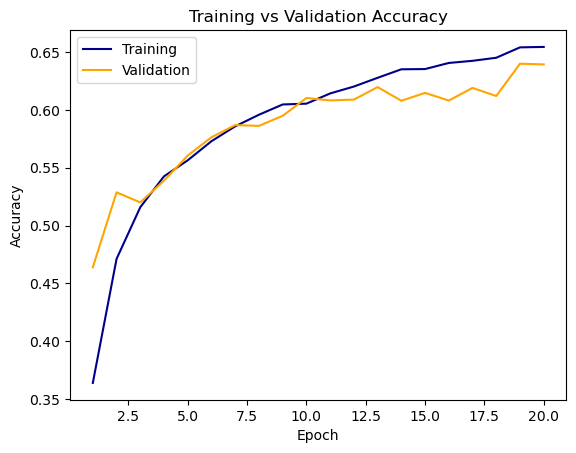

In [17]:
trainAccuracy= history.history['accuracy']
valAccuracy = history.history['val_accuracy']
epochs = range(1, 21)
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs, trainAccuracy, label = 'Training', color = 'darkblue')
plt.plot(epochs, valAccuracy, label = 'Validation', color = 'orange')
plt.legend()
plt.show()

In [18]:
loss, accur = model.evaluate(x_test, y_test_encode)
print('Loss', loss)
print('Accuracy', accur)

313/313 [==============================] - 2s 7ms/step - loss: 1.0346 - accuracy: 0.6431
Loss 1.0345531702041626
Accuracy 0.6431000232696533


3.4.2 Batch Normalisation

In [19]:
model = Sequential([
  Conv2D(filters = 6, kernel_size = (5,5), strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (32, 32, 3)),
  BatchNormalization(),
  MaxPool2D(pool_size = (2, 2)),
  Conv2D(filters = 16, kernel_size = (5,5), padding = 'valid', activation = 'relu'),
  BatchNormalization(),
  MaxPool2D(pool_size = (2, 2)),
  Conv2D(filters = 120, kernel_size = (5,5), activation = 'relu'),
  BatchNormalization(),
  Flatten(),
  Dense(units = 84, activation = 'relu'),
  BatchNormalization(),
  Dense(units = 10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train_encode, epochs = 20, validation_data = (X_val, y_val_encode))

Epoch 1/20
1250/1250 [==============================] - 40s 27ms/step - loss: 1.5168 - accuracy: 0.4639 - val_loss: 1.3404 - val_accuracy: 0.5222
Epoch 2/20
1250/1250 [==============================] - 34s 27ms/step - loss: 1.2112 - accuracy: 0.5734 - val_loss: 1.2324 - val_accuracy: 0.5662
Epoch 3/20
1250/1250 [==============================] - 33s 27ms/step - loss: 1.0789 - accuracy: 0.6209 - val_loss: 1.0856 - val_accuracy: 0.6189
Epoch 4/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9914 - accuracy: 0.6522 - val_loss: 1.1582 - val_accuracy: 0.5973
Epoch 5/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9065 - accuracy: 0.6850 - val_loss: 1.2814 - val_accuracy: 0.5665
Epoch 6/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.8477 - accuracy: 0.7040 - val_loss: 1.1507 - val_accuracy: 0.6200
Epoch 7/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.7877 - accuracy: 0.7231 - val_loss: 1.1426 -

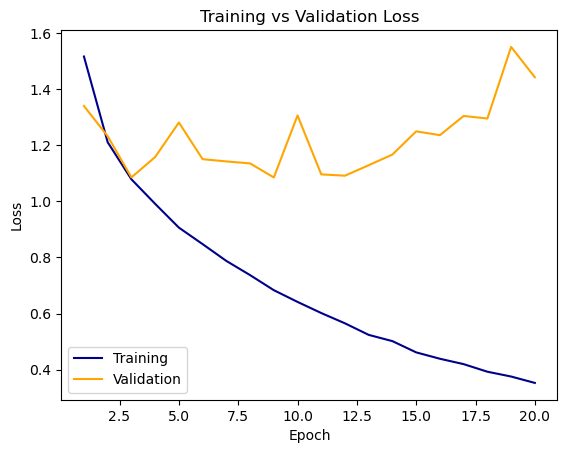

In [21]:
trainLoss= history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, 21)
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(epochs, trainLoss, label = 'Training', color = 'darkblue')
plt.plot(epochs, valLoss, label = 'Validation', color = 'orange')
plt.legend()
plt.show()

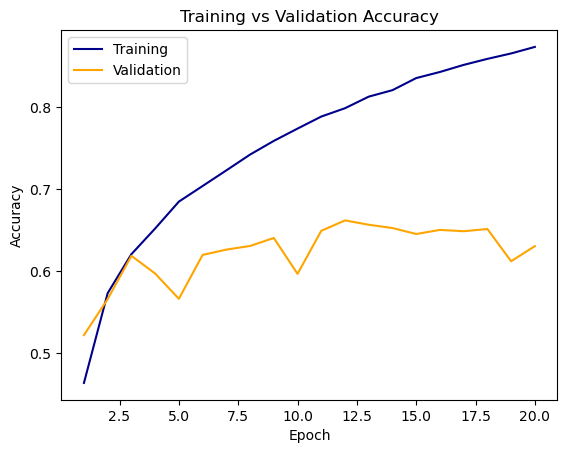

In [22]:
trainAccuracy= history.history['accuracy']
valAccuracy = history.history['val_accuracy']
epochs = range(1, 21)
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(epochs, trainAccuracy, label = 'Training', color = 'darkblue')
plt.plot(epochs, valAccuracy, label = 'Validation', color = 'orange')
plt.legend()
plt.show()

In [23]:
loss, accur = model.evaluate(x_test, y_test_encode)
print('Loss', loss)
print('Accuracy', accur)

313/313 [==============================] - 1s 3ms/step - loss: 1.4237 - accuracy: 0.6303
Loss 1.4236669540405273
Accuracy 0.630299985408783


The dropout model perfomed better than batch normalization or the model that didn't use eithier batch normalization or dropout. This is seen by its lower loss and higher accuracy compared to the other models. We can also see in its epoch to accuracy graph that it seeemed to have a general trend where for each subsequent epoch the accuracy increased as well. Simularly within the dropout model it seeemed to have a general trend where for each subsequent epoch the loss decreases as well. These graphs show that the model that uses dropout is not overfitting the data and the model is improving over time. The other two models initially show these trends in their graph but loss this general trend as the epochs increase. This shows that these models may not have been improving after each epoch and were overfitting. The model that used dropout not overfitting makes sense as dropout is supposed to stop overfitting. Batch normalization is also supposed to stop overfitting but was not as effective as dropout was in doing so. Batch normalization did improve the effectivness of the model just not to the degree that the dropout had done. We can see that the model that used batch normalization performed better than the model that didn't use eithier batch normalization or dropout through its lower loss and higher accuracy.

## Natural Language Processing

We will train a supervised learning model to predict if a movie review has a positive or negative sentiment.

###**Dataset loading & dev/test splits**

1.1) Load the movie reviews dataset from NLTK library

In [24]:
import nltk
nltk.download("movie_reviews")
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import movie_reviews
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
stop = stopwords.words('english')
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1.2) Load the positive & negative reviews

In [25]:
positive_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.raw(fileid)
    positive_reviews.append(words)

negative_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.raw(fileid)
    negative_reviews.append(words)

1.3) Make a data frame that has all reviews and their corresponding labels

In [26]:
# Your code here
sentiment = [1] * len(positive_reviews) + [0] * len(negative_reviews)
total_reviews = positive_reviews + negative_reviews

df_rev = pd.DataFrame({
    'reviews': total_reviews,
    'sentiment': sentiment
})

In [27]:
df_rev

,reviews,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",0
1997,the kids in the hall are an acquired taste . \...,0
1998,there was a time when john carpenter was a gre...,0


1.4) Look at the class distribution of the movie reviews

In [28]:
# Your code here
print('class distribution of the movie reviews', df_rev['sentiment'].value_counts())

class distribution of the movie reviews sentiment
1    1000
0    1000
Name: count, dtype: int64


In [29]:
print('class distribution of the movie reviews', df_rev['sentiment'].value_counts(normalize = True))

class distribution of the movie reviews sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64


1.5) Create a development & test split (80/20 ratio):

In [41]:
# Your code here
X_dev, X_test, y_dev, y_test = train_test_split(
    df_rev['reviews'],
    df_rev['sentiment'],
    train_size = .8,
    random_state = 0
)

## **Data preprocessing**

We will do some data preprocessing before we tokenize the data. You can use the re package in python to remove and and replace these strings.

1.6) Replace numbers in every review with ""

In [42]:
def filt_numb(text):
    return re.sub("\d+", '', text)

X_dev = X_dev.apply(filt_numb)
X_test = X_test.apply(filt_numb)

1.7) Remove all stop words

In [43]:
# Your code here
stop_words = set(stopwords.words('english'))
def filter_stop_word(review):
    word_token = word_tokenize(review)
    filter_review = [i for i in word_token if i not in stop_words]
    return ' '.join(filter_review)
X_dev = X_dev.apply(filter_stop_word)
X_test = X_test.apply(filter_stop_word)

1.8) Remove all punctuations

In [44]:
# Your code here
def remove_punc(review):
    word_token = word_tokenize(review)
    punc_review_remove = [i for i in word_token if i not in string.punctuation]
    return ' '.join(punc_review_remove)
X_dev = X_dev.apply(remove_punc)
X_test = X_test.apply(remove_punc)

1.9) Apply stemming on the development & test datasets using Porter algorithm

In [45]:
# Your code here
porter = PorterStemmer()
def porter_stemmer(review):
    word_token = word_tokenize(review)
    stem_review = [porter.stem(i) for i in word_token]
    return " ".join(stem_review)

X_dev = [porter_stemmer(review) for review in X_dev]
X_test = [porter_stemmer(review) for review in X_test]

1.10) Looking at the dataset do you think any other data pre-processing might be helpful? You can experiment with the features if you want to.

Using lemmatization over stemming would greatly benefit the model. Stemming just remove the last few character of a word. This can often lead to incorrect meaning and spelling such as caring could become car a completely different word. Lemmatization would consider the context of the word and convert it into the words meaningful base form. In this case the word Caring could turn into Care which is related to the original word. We could also go through the data and remove very rarely used words that could cause unnecessary noise in the data. By doing this we could improve on the models performance.

### 2) Model Training

2.1) Create bag of words features for each review in the development dataset

In [46]:
# Your code here
vector = CountVectorizer() 
X_dev_vector = vector.fit_transform(X_dev)
X_test_vector = vector.transform(X_test)

2.2) Train a Logistic Regression model on the development dataset

In [47]:
# Your code here
lr_vector = LogisticRegression().fit(X_dev_vector, y_dev)
y_pred_vect = lr_vector.predict(X_test_vector)

2.3) Create TF-IDF features for each review in the development dataset

In [48]:
# Your code here
tfidf_vectorizer = TfidfVectorizer()
tfidf_X_dev = tfidf_vectorizer.fit_transform(X_dev)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

2.4) Train the Logistic Regression model on the development dataset with TF-IDF features

In [49]:
# Your code here
tfidf_lr = LogisticRegression().fit(tfidf_X_dev, y_dev)
y_pred_tfidf = tfidf_lr.predict(tfidf_X_test)

2.5) Compare the performance of the two models on the test dataset using a classication
report and the scores obtained. Explain the difference in results obtained.

In [50]:
# Your code here

report_vect = classification_report(y_test, y_pred_vect)
report_tfidf = classification_report(y_test, y_pred_tfidf)

In [51]:
print('\t   Classification Report of models that used CountVectorizer', '\n')

print(report_vect)

	   Classification Report of models that used CountVectorizer 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       200
           1       0.83      0.83      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [52]:
print('\t   Classification Report of models that use TfidfVectorizer', '\n')
print(report_tfidf)

	   Classification Report of models that use TfidfVectorizer 

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       200
           1       0.84      0.85      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [53]:
print('Score of model that used CountVectorizer:', lr_vector.score(X_test_vector, y_test))


Score of model that used CountVectorizer: 0.8325


In [54]:
print('Score of model that used TfidfVectorizer:', tfidf_lr.score(tfidf_X_test, y_test))


Score of model that used TfidfVectorizer: 0.8475


The model scoring, precision, recall and f1-score are all better in model that used TF-IDF than the model that used CountVectorizer. This proves that the model trained on data altered by the TF-IDF performed better than the model trained with data altered by the CountVectorizer. The better performance of the data that used TF-IDF could be because unlike CountVectorizer, the TF-IDF increases the importance of lesser used words within the model. As lesser occuring words can be more significant than more often occuring word within the model.